# Case Study - Spaceship Titanic
---
## About Data
The goal is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.
### Columns
- `PassengerId`:  A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- `HomePlanet`: The planet the passenger departed from, typically their planet of permanent residence. 
- `CryoSleep`: Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins. 
- `Cabin`: The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- `Destination`: The planet the passenger will be debarking to.
- `Age`: he age of the passenger.
- `VIP`: Whether the passenger has paid for special VIP service during the voyage.
- `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`: Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- `Name`: The first and last names of the passenger.
- `Transported`: Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

## Importing Libraries

In [1]:
# pip install keras

In [2]:
# pip install tensorflow

In [3]:
# pip install torch

In [4]:
import pandas as pd
pd.set_option('Display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense

import torch
from torch import nn, optim


## Train Dataset

In [5]:
df_train = pd.read_csv('data/train.csv')
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [6]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

## `PassengerId` Column

In [7]:
df_train_modified = df_train.copy()

In [8]:
df_train_modified[['Passenger_prefix', 'Passenger_sufix']] = df_train_modified['PassengerId'].str.split('_', expand = True)
df_train_modified

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Passenger_prefix,Passenger_sufix
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,01
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,01
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,01
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,01


In [9]:
np.unique(df_train_modified['Passenger_prefix'], return_counts = True)

(array(['0001', '0002', '0003', ..., '9278', '9279', '9280'], dtype=object),
 array([1, 1, 2, ..., 1, 1, 2], dtype=int64))

In [10]:
np.unique(df_train_modified['Passenger_sufix'], return_counts = True)

(array(['01', '02', '03', '04', '05', '06', '07', '08'], dtype=object),
 array([6217, 1412,  571,  231,  128,   75,   46,   13], dtype=int64))

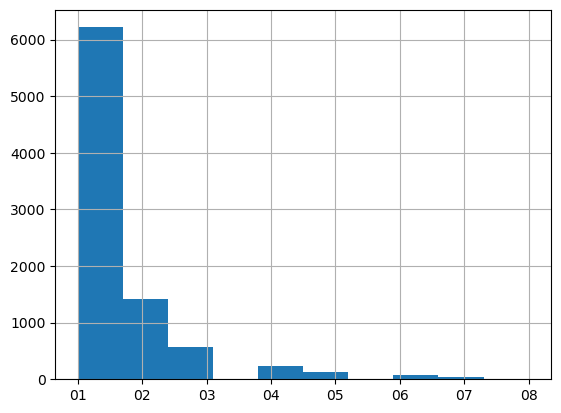

In [11]:
df_train_modified['Passenger_sufix'].hist();

In [12]:
df_train_modified = df_train_modified.drop(['PassengerId', 'Passenger_prefix', 'Passenger_sufix'], axis = 1)
df_train_modified

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


## `HomePLanet` Column

In [13]:
df_train_modified['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [14]:
total_homeplanet_data = 4602 + 2131 + 1759
print(total_homeplanet_data)
comp = total_homeplanet_data / len(df_train_modified)
print(comp)

8492
0.9768779477740711


In [15]:
earth = 4602
europa = 2131
mars = 1759

earth_prob = earth / total_homeplanet_data
europa_prob = europa / total_homeplanet_data
mars_prob = mars / total_homeplanet_data

print(earth_prob)
print(europa_prob)
print(mars_prob)

0.541921808761187
0.2509420631182289
0.20713612812058407


In [16]:
df_train_modified['HomePlanet'] = df_train_modified['HomePlanet'].fillna('Earth')

In [17]:
df_train_modified.isnull().sum()

HomePlanet        0
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [18]:
df_train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

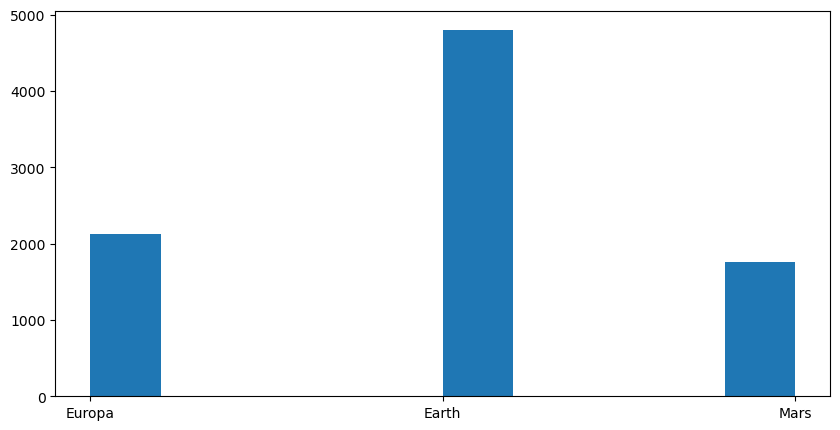

In [19]:
plt.figure(figsize=(10,5))
plt.hist(df_train_modified['HomePlanet']);

## `CryoSleep` Column

In [20]:
df_train_modified['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [21]:
total_cryosleep_data = 5439 + 3037
print(total_cryosleep_data)
comp = total_cryosleep_data / len(df_train)
print(comp)

8476
0.9750373864028529


In [22]:
false = 5439
true = 3037

false_prob = false / total_cryosleep_data
true_prob = true / total_cryosleep_data

print(false_prob)
print(true_prob)

0.641694195375177
0.35830580462482303


In [23]:
df_train_modified['CryoSleep'] = df_train_modified['CryoSleep'].fillna(False)
df_train_modified['CryoSleep'].isnull().sum()

0

## `Cabin` Column

In [24]:
df_train_modified

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [25]:
df_train_modified[['Cabin_deck', 'Cabin_num', 'Cabin_side']] = df_train_modified['Cabin'].str.split('/', expand = True)
df_train_modified

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


In [26]:
df_train_modified = df_train_modified.drop('Cabin', axis = 1)
df_train_modified

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


### `Cabin_deck` Column

In [27]:
df_train_modified['Cabin_deck'].isnull().sum()

199

In [28]:
df_train_modified['Cabin_deck'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Cabin_deck, dtype: int64

In [29]:
total_cabin_deck_data = 2794 + 2559 + 876 + 779 + 747 + 478 + 256 + 5
print(2794 / total_cabin_deck_data)
print(2559 / total_cabin_deck_data)

0.32893807393454205
0.30127148575465035


In [30]:
df_train_modified['Cabin_deck'] = df_train_modified['Cabin_deck'].fillna('F', limit = 100)
df_train_modified['Cabin_deck'] = df_train_modified['Cabin_deck'].fillna('G', limit = 99)
df_train_modified['Cabin_deck'].isnull().sum()

0

<Axes: >

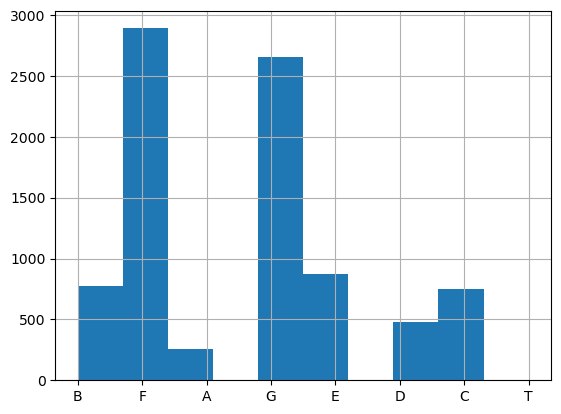

In [31]:
df_train_modified['Cabin_deck'].hist()

### `Cabin_num` Column

In [32]:
df_train_modified['Cabin_num'].value_counts()

82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: Cabin_num, Length: 1817, dtype: int64

In [33]:
df_train_modified

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


### `Cabin_side` Column

In [34]:
df_train_modified['Cabin_side'].isnull().sum()

199

In [35]:
len(df_train_modified)

8693

In [36]:
df_train_modified['Cabin_side'].value_counts()

S    4288
P    4206
Name: Cabin_side, dtype: int64

In [37]:
total_cabin_side_data = 4288 + 4206
print(4288 / total_cabin_side_data)
print(4206 / total_cabin_side_data)

0.5048269366611726
0.49517306333882743


In [38]:
df_train_modified['Cabin_side'] = df_train_modified['Cabin_side'].fillna('S', limit=100)
df_train_modified['Cabin_side'] = df_train_modified['Cabin_side'].fillna('P', limit=99)

In [39]:
df_train_modified['Cabin_side'].value_counts()

S    4388
P    4305
Name: Cabin_side, dtype: int64

In [40]:
df_train_modified['Cabin_side'].isnull().sum()

0

## `Destination` Column

In [41]:
df_train_modified

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


In [42]:
df_train_modified['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [43]:
df_train_modified['Destination'].isnull().sum()

182

In [44]:
total_destination_data = 5915 + 1800 + 796
print(5915 / total_destination_data)
print(1800 / total_destination_data)
print(796 / total_destination_data)

0.6949829632240629
0.21149101163200565
0.09352602514393138


In [45]:
df_train_modified['Destination'] = df_train_modified['Destination'].fillna('TRAPPIST-1e')
df_train_modified['Destination'].isnull().sum()

0

## `Age` Column

In [46]:
df_train_modified['Age'].describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

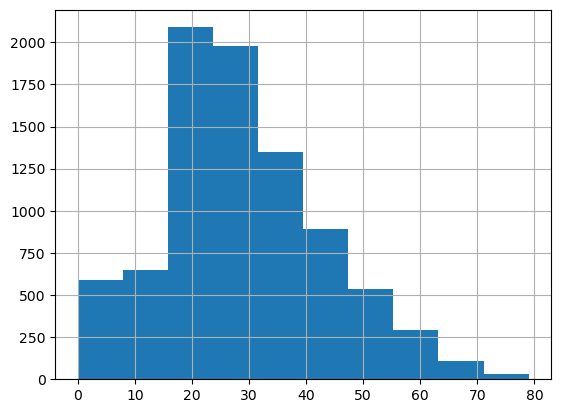

In [47]:
df_train_modified['Age'].hist();

In [48]:
df_train_modified['Age'] = df_train_modified['Age'].fillna(round(df_train_modified['Age'].mean()))
df_train_modified['Age'].isnull().sum()

0

## `VIP` Column

In [49]:
df_train_modified

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


In [50]:
df_train_modified['VIP'].isnull().sum()

203

In [51]:
df_train_modified['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [52]:
total_vip_data = 8291 + 199
print(8291 / total_vip_data)
print(199 / total_vip_data)

0.9765606595995289
0.023439340400471142


In [53]:
df_train_modified['VIP'] = df_train_modified['VIP'].fillna(False)
df_train_modified['VIP'].isnull().sum()

0

## `RoomService` Column

In [54]:
df_train_modified

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


In [55]:
df_train_modified['RoomService'].isnull().sum()

181

In [56]:
df_train_modified['RoomService'].describe()

count     8512.000000
mean       224.687617
std        666.717663
min          0.000000
25%          0.000000
50%          0.000000
75%         47.000000
max      14327.000000
Name: RoomService, dtype: float64

<Axes: >

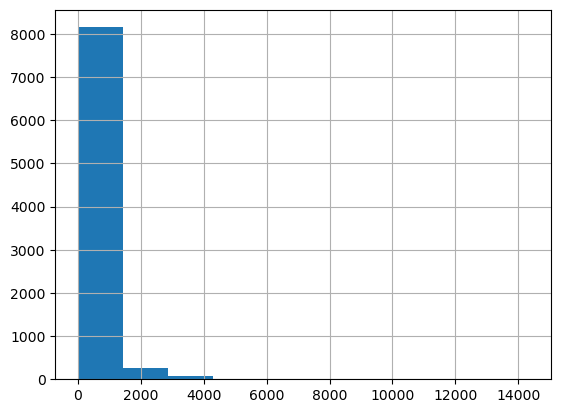

In [57]:
df_train_modified['RoomService'].hist()

In [58]:
df_train_modified['RoomService'] = df_train_modified['RoomService'].fillna(0)
df_train_modified['RoomService'].isnull().sum()

0

## `FoodCourt` Column

In [59]:
df_train_modified['FoodCourt'].isnull().sum()

183

In [60]:
df_train_modified['FoodCourt'].describe()

count     8510.000000
mean       458.077203
std       1611.489240
min          0.000000
25%          0.000000
50%          0.000000
75%         76.000000
max      29813.000000
Name: FoodCourt, dtype: float64

<Axes: >

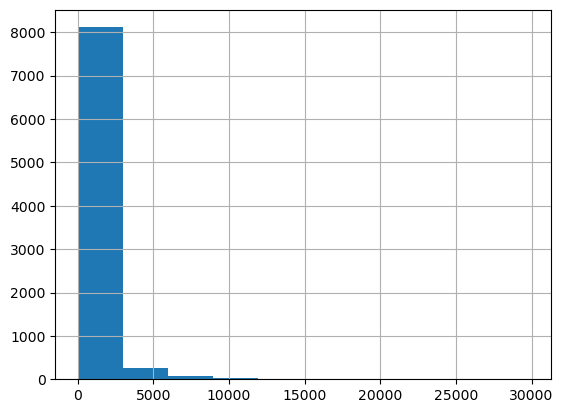

In [61]:
df_train_modified['FoodCourt'].hist()

In [62]:
df_train_modified['FoodCourt'] = df_train_modified['FoodCourt'].fillna(0)
df_train_modified['FoodCourt'].isnull().sum()

0

## `ShoppingMall` Column

In [63]:
df_train_modified['ShoppingMall'].isnull().sum()

208

In [64]:
df_train_modified['ShoppingMall'].describe()

count     8485.000000
mean       173.729169
std        604.696458
min          0.000000
25%          0.000000
50%          0.000000
75%         27.000000
max      23492.000000
Name: ShoppingMall, dtype: float64

<Axes: >

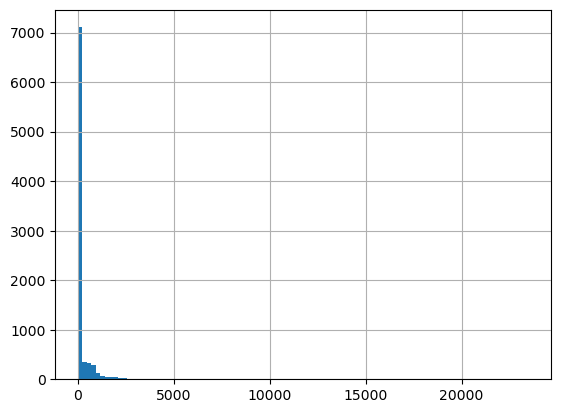

In [65]:
df_train_modified['ShoppingMall'].hist(bins = 100)

In [66]:
df_train_modified['ShoppingMall'] = df_train_modified['ShoppingMall'].fillna(0)
df_train_modified['ShoppingMall'].isnull().sum()

0

## `Spa` Column

In [67]:
df_train_modified['Spa'].isnull().sum()

183

In [68]:
df_train_modified['Spa'].describe()

count     8510.000000
mean       311.138778
std       1136.705535
min          0.000000
25%          0.000000
50%          0.000000
75%         59.000000
max      22408.000000
Name: Spa, dtype: float64

<Axes: >

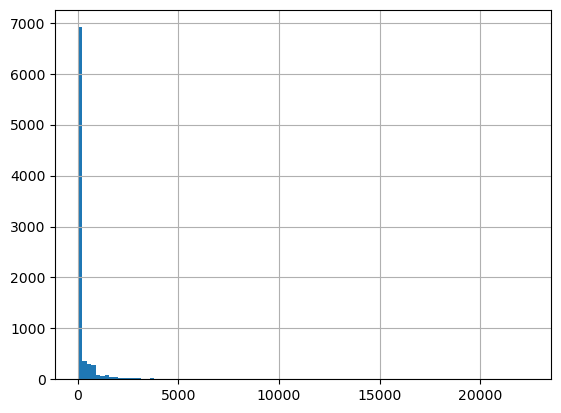

In [69]:
df_train_modified['Spa'].hist(bins = 100)

In [70]:
df_train_modified['Spa'] = df_train_modified['Spa'].fillna(0)
df_train_modified['Spa'].isnull().sum()

0

## `VRDeck` Column

In [71]:
df_train_modified['VRDeck'].isnull().sum()

188

In [72]:
df_train_modified['VRDeck'].describe()

count     8505.000000
mean       304.854791
std       1145.717189
min          0.000000
25%          0.000000
50%          0.000000
75%         46.000000
max      24133.000000
Name: VRDeck, dtype: float64

In [73]:
len(df_train_modified['VRDeck'][df_train_modified['VRDeck'] > 0])

3010

In [74]:
len(df_train_modified) - len(df_train_modified['VRDeck'][df_train_modified['VRDeck'] > 0])

5683

In [75]:
3010 / len(df_train_modified)

0.3462556079604279

In [76]:
5683 / len(df_train_modified)

0.653744392039572

In [77]:
df_train_modified['VRDeck'] = df_train_modified['VRDeck'].fillna(0)
df_train_modified['VRDeck'].isnull().sum()

0

## `Name` Column

In [78]:
df_train_modified

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


In [79]:
df_train_modified['Name'].isnull().sum()

200

In [80]:
df_train_modified[['FirstName', 'LastName']] = df_train_modified['Name'].str.split(' ', expand = True)

In [81]:
df_train_modified

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side,FirstName,LastName
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,Maham,Ofracculy
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,Juanna,Vines
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,Altark,Susent
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,Solam,Susent
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,Willy,Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P,Gravior,Noxnuther
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S,Kurta,Mondalley
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S,Fayey,Connon
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S,Celeon,Hontichre


In [82]:
df_train_modified['LastName'].value_counts()

Casonston     18
Oneiles       16
Domington     15
Litthews      15
Browlerson    14
              ..
Covale         1
Dun            1
Witalnerod     1
Deryplinet     1
Sionerorly     1
Name: LastName, Length: 2217, dtype: int64

In [83]:
df_train_modified = df_train_modified.drop(['Name', 'FirstName', 'LastName'], axis = 1)
df_train_modified

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_num,Cabin_side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608,S


## `Transported` Column - Target

In [84]:
df_train_modified['Transported'].isnull().sum()

0

<Axes: xlabel='Transported', ylabel='count'>

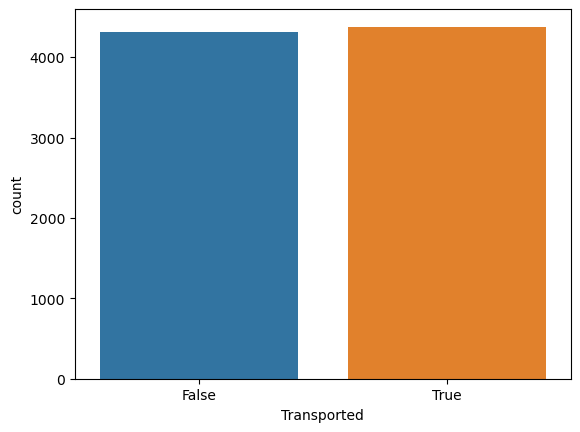

In [85]:
sns.countplot(x = df_train_modified['Transported'])

In [86]:
np.unique(df_train_modified['Transported'], return_counts = True)

(array([False,  True]), array([4315, 4378], dtype=int64))

## X & y

In [87]:
df_train_modified

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_num,Cabin_side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608,S


In [88]:
df_train_modified.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Cabin_deck        0
Cabin_num       199
Cabin_side        0
dtype: int64

In [89]:
df_train_modified.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'Cabin_deck', 'Cabin_num', 'Cabin_side'],
      dtype='object')

In [90]:
X = df_train_modified[['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_deck', 'Cabin_side']]
X

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_deck,Cabin_side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,A,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,G,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,G,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,E,S


In [91]:
y = df_train_modified['Transported']
y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

## Data Transformation

In [92]:
for i in X:
    print(X[i].dtype)

object
bool
object
float64
bool
float64
float64
float64
float64
float64
object
object


In [93]:
le = LabelEncoder()

In [94]:
X['HomePlanet'] = X['HomePlanet'].astype(str)
X['CryoSleep'] = X['CryoSleep'].astype(str)
X['Destination'] = X['Destination'].astype(str)
X['VIP'] = X['VIP'].astype(str)
# X['Passenger_sufix'] = X['Passenger_sufix'].astype(str)
X['Cabin_deck'] = X['Cabin_deck'].astype(str)
X['Cabin_side'] = X['Cabin_side'].astype(str)

In [95]:
X['HomePlanet'] = le.fit_transform(X['HomePlanet'])
X['CryoSleep'] = le.fit_transform(X['CryoSleep'])
X['Destination'] = le.fit_transform(X['Destination'])
X['VIP'] = le.fit_transform(X['VIP'])
# X['Passenger_sufix'] = le.fit_transform(X['Passenger_sufix'])
X['Cabin_deck'] = le.fit_transform(X['Cabin_deck'])
X['Cabin_side'] = le.fit_transform(X['Cabin_side'])

In [96]:
X

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_deck,Cabin_side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,1,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,5,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,6,1
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,6,1
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,4,1


In [97]:
X = pd.get_dummies(data=X, columns=['HomePlanet', 'CryoSleep', 'VIP', 'Destination', 'Cabin_deck', 'Cabin_side'])
X

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_0,HomePlanet_1,HomePlanet_2,CryoSleep_0,CryoSleep_1,VIP_0,VIP_1,Destination_0,Destination_1,Destination_2,Cabin_deck_0,Cabin_deck_1,Cabin_deck_2,Cabin_deck_3,Cabin_deck_4,Cabin_deck_5,Cabin_deck_6,Cabin_deck_7,Cabin_side_0,Cabin_side_1
0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1
8690,26.0,0.0,0.0,1872.0,1.0,0.0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1


## Data Split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, stratify=y)

In [99]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6954, 26), (6954,), (1739, 26), (1739,))

In [100]:
## Scaling the data for better performance
scaler =  StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [101]:
X_train_scaled

array([[ 0.85367837, -0.3289693 , -0.2864827 , ..., -0.02399041,
        -0.99626811,  0.99626811],
       [ 1.06336398,  1.80130754, -0.10177621, ..., -0.02399041,
        -0.99626811,  0.99626811],
       [ 1.76231604, -0.3289693 , -0.2864827 , ..., -0.02399041,
        -0.99626811,  0.99626811],
       ...,
       [ 0.15472631, -0.3289693 , -0.2864827 , ..., -0.02399041,
         1.00374587, -1.00374587],
       [ 1.62252563, -0.3289693 , -0.13329609, ..., -0.02399041,
         1.00374587, -1.00374587],
       [-0.33454012, -0.32748994,  0.00791297, ..., -0.02399041,
         1.00374587, -1.00374587]])

In [102]:
X_test_scaled

array([[ 2.48868721,  2.03460294, -0.259958  , ..., -0.02398695,
         1.03333269, -1.03333269],
       [-0.20829528,  1.13795541, -0.25628269, ..., -0.02398695,
        -0.96774253,  0.96774253],
       [-0.55406227, -0.35421412, -0.259958  , ..., -0.02398695,
        -0.96774253,  0.96774253],
       ...,
       [-0.48490887, -0.35421412, -0.259958  , ..., -0.02398695,
        -0.96774253,  0.96774253],
       [-0.62321567, -0.35421412, -0.259958  , ..., -0.02398695,
        -0.96774253,  0.96774253],
       [ 0.48323869, -0.35421412, -0.259958  , ..., -0.02398695,
         1.03333269, -1.03333269]])

# Neural Networks

## Sklearn

In [103]:
layers = (31 + 1) / 2
print('Min Layers:', layers)

Min Layers: 16.0


In [104]:
nn_sklearn = MLPClassifier(activation='logistic',
                   solver= 'adam',
                   max_iter= 250,
                   batch_size=500,
                   learning_rate_init=0.001,
                   hidden_layer_sizes=(20, 20),
                   shuffle=True,     
                   verbose= True, 
                   random_state = 0)

In [105]:
nn_sklearn.fit(X_train_scaled, y_train)

Iteration 1, loss = 0.69327104
Iteration 2, loss = 0.68952613
Iteration 3, loss = 0.68545089
Iteration 4, loss = 0.67970150
Iteration 5, loss = 0.67177081
Iteration 6, loss = 0.66086780
Iteration 7, loss = 0.64669388
Iteration 8, loss = 0.62902567
Iteration 9, loss = 0.60874328
Iteration 10, loss = 0.58767983
Iteration 11, loss = 0.56673999
Iteration 12, loss = 0.54777063
Iteration 13, loss = 0.53143353
Iteration 14, loss = 0.51792074
Iteration 15, loss = 0.50703801
Iteration 16, loss = 0.49847613
Iteration 17, loss = 0.49132569
Iteration 18, loss = 0.48538836
Iteration 19, loss = 0.48070999
Iteration 20, loss = 0.47633114
Iteration 21, loss = 0.47239320
Iteration 22, loss = 0.46921434
Iteration 23, loss = 0.46597749
Iteration 24, loss = 0.46317646
Iteration 25, loss = 0.46087445
Iteration 26, loss = 0.45839625
Iteration 27, loss = 0.45580507
Iteration 28, loss = 0.45350973
Iteration 29, loss = 0.45135024
Iteration 30, loss = 0.44942871
Iteration 31, loss = 0.44748733
Iteration 32, los

MLPClassifier(activation='logistic', batch_size=500,
              hidden_layer_sizes=(20, 20), max_iter=250, random_state=0,
              verbose=True)

In [106]:
predictions = nn_sklearn.predict(X_test_scaled)

In [107]:
print('Train Accuracy: ', nn_sklearn.score(X_train_scaled, y_train))
print('Test Accuracy:', accuracy_score(y_test, predictions))

Train Accuracy:  0.8157894736842105
Test Accuracy: 0.7889591719378953


In [108]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.82      0.74      0.78       863
        True       0.77      0.84      0.80       876

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



<Axes: >

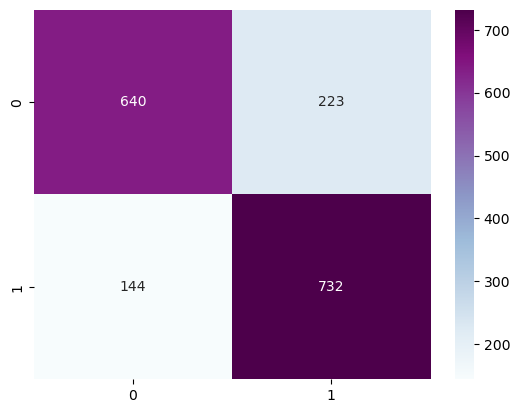

In [109]:
sns.heatmap(confusion_matrix(y_test, predictions), annot = True, fmt='g', cmap = 'BuPu')

In [110]:
y_test

4433    False
8479    False
7182     True
5157     True
999      True
        ...  
8689    False
1817    False
4623     True
4998     True
3615     True
Name: Transported, Length: 1739, dtype: bool

In [111]:
predictions

array([False, False,  True, ...,  True,  True,  True])

## Keras

In [112]:
keras.utils.set_random_seed(812)

In [113]:
X.shape

(8693, 26)

In [114]:
nn_keras = Sequential()
nn_keras.add(Dense(units = 20, activation = 'relu', input_dim= X.shape[1]))
nn_keras.add(Dense(units = 20, activation = 'relu'))
nn_keras.add(Dense(units = 1, activation = 'sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001) 

nn_keras.compile(optimizer=optimizer, loss = 'BinaryCrossentropy' , metrics=['binary_accuracy'])
nn_keras.fit(X_train_scaled, y_train, epochs = 250, batch_size=500, shuffle=True)

Epoch 1/250
14/14 [==============================] - 4s 18ms/step - loss: 0.6721 - binary_accuracy: 0.5815
Epoch 2/250
14/14 [==============================] - 0s 16ms/step - loss: 0.6247 - binary_accuracy: 0.6427
Epoch 3/250
14/14 [==============================] - 0s 16ms/step - loss: 0.5899 - binary_accuracy: 0.6905
Epoch 4/250
14/14 [==============================] - 0s 16ms/step - loss: 0.5598 - binary_accuracy: 0.7133
Epoch 5/250
14/14 [==============================] - 0s 15ms/step - loss: 0.5339 - binary_accuracy: 0.7335
Epoch 6/250
14/14 [==============================] - 0s 15ms/step - loss: 0.5128 - binary_accuracy: 0.7478
Epoch 7/250
14/14 [==============================] - 0s 10ms/step - loss: 0.4945 - binary_accuracy: 0.7578
Epoch 8/250
14/14 [==============================] - 0s 6ms/step - loss: 0.4786 - binary_accuracy: 0.7673
Epoch 9/250
14/14 [==============================] - 0s 6ms/step - loss: 0.4651 - binary_accuracy: 0.7729
Epoch 10/250
14/14 [===================

In [115]:
y_train_predicted = nn_keras.predict(X_train_scaled)

218/218 [==============================] - 1s 5ms/step


In [116]:
y_test_predicted = nn_keras.predict(X_test_scaled)

55/55 [==============================] - 0s 5ms/step


In [117]:
y_test_predicted = np.array(y_test_predicted > 0.5)
y_test_predicted

array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [118]:
y_train_predicted = np.array(y_train_predicted > 0.5)
y_train_predicted

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [119]:
print('Train Accuracy:', accuracy_score(y_train, y_train_predicted))
print('Test Accuracy:', accuracy_score(y_test, y_test_predicted))

Train Accuracy: 0.8324705205637043
Test Accuracy: 0.7883841288096607


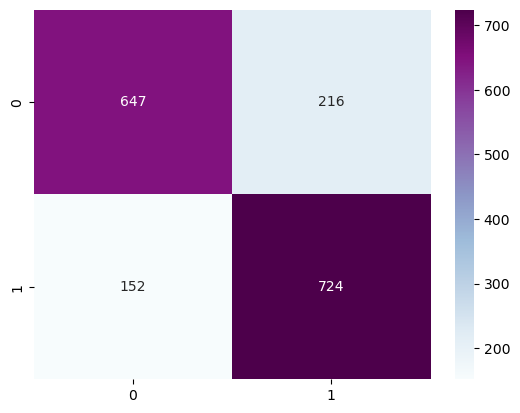

In [120]:
sns.heatmap(confusion_matrix(y_test, y_test_predicted), annot = True, cmap = 'BuPu', fmt = 'g');

In [121]:
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

       False       0.81      0.75      0.78       863
        True       0.77      0.83      0.80       876

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



## Pytorch

In [122]:
torch.manual_seed(123)

In [123]:
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((6954, 26), (1739, 26), (6954,), (1739,))

### Tensors Transformation

In [124]:
type(X_train_scaled)

numpy.ndarray

In [125]:
type(y_train)

pandas.core.series.Series

In [126]:
X_train_scaled = torch.tensor(X_train_scaled, dtype = torch.float)
y_train = torch.tensor(np.array(y_train), dtype = torch.float)

In [127]:
type(X_train_scaled)

torch.Tensor

In [128]:
type(y_train)

torch.Tensor

In [129]:
dataset = torch.utils.data.TensorDataset(X_train_scaled, y_train)

In [130]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [131]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=500, shuffle = True)

In [132]:
classifier = nn.Sequential(
    nn.Linear(in_features=X.shape[1], out_features=20),
    nn.ReLU(),
    
    nn.Linear(20, 20),
    nn.ReLU(),
    
    nn.Linear(20, 1),
    nn.Sigmoid(),

)

In [133]:
classifier.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=26, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=20, bias=True)
  (3): ReLU()
  (4): Linear(in_features=20, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [134]:
criterion = nn.BCELoss()

In [135]:
optimizer = torch.optim.Adam(classifier.parameters(), lr = 0.001, weight_decay=0.0001)

### Model Train

In [136]:
for epoch in range(250):
    running_loss = 0.
    
    for data in train_loader:
        inputs, labels = data
        #print(inputs)
        #print('')
        #print(labels)
        optimizer.zero_grad()
        
        outputs = classifier(inputs) #classifier.forward(inputs)
        #print(outputs)
        labels = labels.unsqueeze(1)
        loss = criterion(outputs, labels)
        #print(loss)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    print('Epoch %3d: loss %.5f' % (epoch + 1, running_loss/len(train_loader)))

Epoch   1: loss 0.68189
Epoch   2: loss 0.66082
Epoch   3: loss 0.63229
Epoch   4: loss 0.59441
Epoch   5: loss 0.55148
Epoch   6: loss 0.51292
Epoch   7: loss 0.48430
Epoch   8: loss 0.46363
Epoch   9: loss 0.44788
Epoch  10: loss 0.43699
Epoch  11: loss 0.42803
Epoch  12: loss 0.42113
Epoch  13: loss 0.41585
Epoch  14: loss 0.41142
Epoch  15: loss 0.40848
Epoch  16: loss 0.40573
Epoch  17: loss 0.40302
Epoch  18: loss 0.40171
Epoch  19: loss 0.40020
Epoch  20: loss 0.39864
Epoch  21: loss 0.39756
Epoch  22: loss 0.39716
Epoch  23: loss 0.39611
Epoch  24: loss 0.39534
Epoch  25: loss 0.39495
Epoch  26: loss 0.39436
Epoch  27: loss 0.39361
Epoch  28: loss 0.39321
Epoch  29: loss 0.39275
Epoch  30: loss 0.39206
Epoch  31: loss 0.39210
Epoch  32: loss 0.39149
Epoch  33: loss 0.39105
Epoch  34: loss 0.39042
Epoch  35: loss 0.39012
Epoch  36: loss 0.38950
Epoch  37: loss 0.38972
Epoch  38: loss 0.38931
Epoch  39: loss 0.38899
Epoch  40: loss 0.38851
Epoch  41: loss 0.38810
Epoch  42: loss 

In [137]:
params = list(classifier.parameters())
params

[Parameter containing:
 tensor([[-1.7974e-01, -2.7422e-01,  2.2888e-01,  2.1151e-01, -5.4883e-01,
          -5.0461e-01, -1.3400e-01, -4.4658e-02, -2.2373e-01,  1.6133e-01,
          -1.4585e-01,  6.5445e-02, -1.3239e-01, -1.7455e-01,  9.8585e-02,
          -1.0391e-01, -1.8262e-01,  1.8874e-01, -1.0767e-01,  1.2642e-01,
           1.9699e-01, -1.6421e-02, -3.7833e-02,  7.6929e-02, -9.8424e-03,
          -1.5007e-02],
         [-7.5038e-02,  1.5935e-01,  8.1900e-02, -1.5598e-02,  4.2349e-01,
           3.7395e-01,  4.9930e-02,  1.2366e-01,  1.7420e-01,  1.8665e-01,
          -3.7213e-01, -1.3729e-01, -5.0790e-02, -3.9773e-02,  8.1734e-02,
          -1.1320e-01, -2.7441e-02,  9.7488e-02, -5.6978e-02,  1.1999e-01,
          -2.0437e-01,  1.3874e-01,  1.6162e-01,  8.6793e-02,  5.9458e-02,
           4.9130e-02],
         [-2.4711e-02, -1.5867e-02,  6.2830e-03, -3.3284e-01,  7.8025e-02,
          -1.9988e-01, -1.3740e-01, -1.7450e-01,  3.0175e-01, -6.3999e-02,
           4.1760e-02, -1.149

In [138]:
weights0 = params[0]
weights0.shape

torch.Size([20, 26])

In [139]:
weights0

Parameter containing:
tensor([[-1.7974e-01, -2.7422e-01,  2.2888e-01,  2.1151e-01, -5.4883e-01,
         -5.0461e-01, -1.3400e-01, -4.4658e-02, -2.2373e-01,  1.6133e-01,
         -1.4585e-01,  6.5445e-02, -1.3239e-01, -1.7455e-01,  9.8585e-02,
         -1.0391e-01, -1.8262e-01,  1.8874e-01, -1.0767e-01,  1.2642e-01,
          1.9699e-01, -1.6421e-02, -3.7833e-02,  7.6929e-02, -9.8424e-03,
         -1.5007e-02],
        [-7.5038e-02,  1.5935e-01,  8.1900e-02, -1.5598e-02,  4.2349e-01,
          3.7395e-01,  4.9930e-02,  1.2366e-01,  1.7420e-01,  1.8665e-01,
         -3.7213e-01, -1.3729e-01, -5.0790e-02, -3.9773e-02,  8.1734e-02,
         -1.1320e-01, -2.7441e-02,  9.7488e-02, -5.6978e-02,  1.1999e-01,
         -2.0437e-01,  1.3874e-01,  1.6162e-01,  8.6793e-02,  5.9458e-02,
          4.9130e-02],
        [-2.4711e-02, -1.5867e-02,  6.2830e-03, -3.3284e-01,  7.8025e-02,
         -1.9988e-01, -1.3740e-01, -1.7450e-01,  3.0175e-01, -6.3999e-02,
          4.1760e-02, -1.1498e-01, -8.2246e-

In [140]:
weights1 = params[2]
weights1.shape

torch.Size([20, 20])

### Model Evaluation

In [141]:
classifier.eval()

Sequential(
  (0): Linear(in_features=26, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=20, bias=True)
  (3): ReLU()
  (4): Linear(in_features=20, out_features=1, bias=True)
  (5): Sigmoid()
)

In [142]:
type(X_test_scaled)

numpy.ndarray

In [143]:
X_test_scaled = torch.tensor(X_test_scaled, dtype = torch.float)

In [144]:
type(X_test_scaled)

torch.Tensor

In [145]:
y_train_predicted = classifier(X_train_scaled)

In [146]:
y_train_predicted

tensor([[0.0478],
        [0.1489],
        [0.1421],
        ...,
        [0.9882],
        [0.6106],
        [0.1569]], grad_fn=<SigmoidBackward0>)

In [147]:
y_train

tensor([0., 1., 1.,  ..., 1., 1., 0.])

In [148]:
y_train_predicted = np.array(y_train_predicted > 0.5)
y_train_predicted

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [149]:
predictions = classifier(X_test_scaled)

In [150]:
type(predictions)

torch.Tensor

In [151]:
predictions

tensor([[0.0410],
        [0.0962],
        [0.9915],
        ...,
        [0.9914],
        [0.6868],
        [0.5867]], grad_fn=<SigmoidBackward0>)

In [152]:
predictions = np.array(predictions > 0.5)
predictions

array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [153]:
print('Train Accuracy:', accuracy_score(y_train, y_train_predicted))
print('Test Accuracy:', accuracy_score(y_test, predictions))

Train Accuracy: 0.8283002588438308
Test Accuracy: 0.7941345600920069


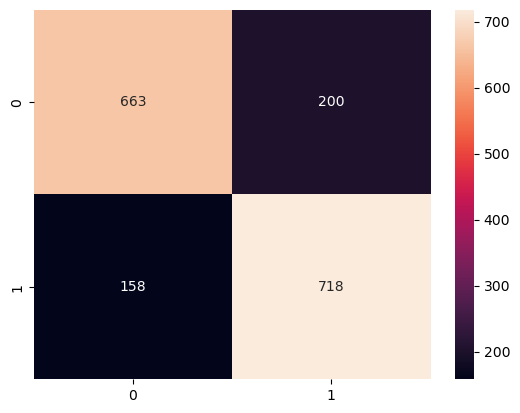

In [154]:
sns.heatmap(confusion_matrix(y_test, predictions), annot = True, fmt = 'g');

In [155]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.81      0.77      0.79       863
        True       0.78      0.82      0.80       876

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



# Preparation To Submit On Kaggle

In [156]:
X

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_0,HomePlanet_1,HomePlanet_2,CryoSleep_0,CryoSleep_1,VIP_0,VIP_1,Destination_0,Destination_1,Destination_2,Cabin_deck_0,Cabin_deck_1,Cabin_deck_2,Cabin_deck_3,Cabin_deck_4,Cabin_deck_5,Cabin_deck_6,Cabin_deck_7,Cabin_side_0,Cabin_side_1
0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1
8690,26.0,0.0,0.0,1872.0,1.0,0.0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1


In [157]:
y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [158]:
X = scaler.fit_transform(X)
X

array([[ 0.70918878, -0.33310466, -0.28102673, ..., -0.02398972,
         1.00959393, -1.00959393],
       [-0.33696396, -0.16807343, -0.27538657, ..., -0.02398972,
        -0.99049724,  0.99049724],
       [ 2.03431559, -0.2680006 ,  1.95999765, ..., -0.02398972,
        -0.99049724,  0.99049724],
       ...,
       [-0.19747692, -0.33310466, -0.28102673, ..., -0.02398972,
        -0.99049724,  0.99049724],
       [ 0.22098417, -0.33310466,  0.37636549, ..., -0.02398972,
        -0.99049724,  0.99049724],
       [ 1.05790636, -0.14233462,  2.656871  , ..., -0.02398972,
        -0.99049724,  0.99049724]])

In [159]:
nn_sklearn.fit(X, y)

Iteration 1, loss = 0.69251138
Iteration 2, loss = 0.68744493
Iteration 3, loss = 0.68097137
Iteration 4, loss = 0.67110037
Iteration 5, loss = 0.65629477
Iteration 6, loss = 0.63627572
Iteration 7, loss = 0.61189805
Iteration 8, loss = 0.58546579
Iteration 9, loss = 0.55977421
Iteration 10, loss = 0.53757070
Iteration 11, loss = 0.52007273
Iteration 12, loss = 0.50681646
Iteration 13, loss = 0.49663958
Iteration 14, loss = 0.48898345
Iteration 15, loss = 0.48291114
Iteration 16, loss = 0.47775926
Iteration 17, loss = 0.47343729
Iteration 18, loss = 0.46976825
Iteration 19, loss = 0.46619339
Iteration 20, loss = 0.46334117
Iteration 21, loss = 0.46023739
Iteration 22, loss = 0.45752017
Iteration 23, loss = 0.45501584
Iteration 24, loss = 0.45278358
Iteration 25, loss = 0.45046263
Iteration 26, loss = 0.44842721
Iteration 27, loss = 0.44669167
Iteration 28, loss = 0.44480935
Iteration 29, loss = 0.44343422
Iteration 30, loss = 0.44195459
Iteration 31, loss = 0.44102360
Iteration 32, los

MLPClassifier(activation='logistic', batch_size=500,
              hidden_layer_sizes=(20, 20), max_iter=250, random_state=0,
              verbose=True)

In [160]:
nn_keras.fit(X, y, epochs = 250, batch_size=500, shuffle=True)

Epoch 1/250
18/18 [==============================] - 0s 17ms/step - loss: 0.3759 - binary_accuracy: 0.8219
Epoch 2/250
18/18 [==============================] - 0s 17ms/step - loss: 0.3744 - binary_accuracy: 0.8209
Epoch 3/250
18/18 [==============================] - 0s 16ms/step - loss: 0.3739 - binary_accuracy: 0.8228
Epoch 4/250
18/18 [==============================] - 0s 8ms/step - loss: 0.3738 - binary_accuracy: 0.8208
Epoch 5/250
18/18 [==============================] - 0s 6ms/step - loss: 0.3734 - binary_accuracy: 0.8197
Epoch 6/250
18/18 [==============================] - 0s 6ms/step - loss: 0.3731 - binary_accuracy: 0.8209
Epoch 7/250
18/18 [==============================] - 0s 5ms/step - loss: 0.3733 - binary_accuracy: 0.8203
Epoch 8/250
18/18 [==============================] - 0s 6ms/step - loss: 0.3731 - binary_accuracy: 0.8208
Epoch 9/250
18/18 [==============================] - 0s 6ms/step - loss: 0.3726 - binary_accuracy: 0.8194
Epoch 10/250
18/18 [=======================

In [161]:
X = torch.tensor(X, dtype = torch.float)
y = torch.tensor(np.array(y), dtype = torch.float)

In [162]:
dataset = torch.utils.data.TensorDataset(X, y)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=500, shuffle = True)

In [163]:
for epoch in range(250):
    running_loss = 0.
    
    for data in train_loader:
        inputs, labels = data
        #print(inputs)
        #print('')
        #print(labels)
        optimizer.zero_grad()
        
        outputs = classifier(inputs) #classifier.forward(inputs)
        #print(outputs)
        labels = labels.unsqueeze(1)
        loss = criterion(outputs, labels)
        #print(loss)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    print('Epoch %3d: loss %.5f' % (epoch + 1, running_loss/len(train_loader)))

Epoch   1: loss 0.37951
Epoch   2: loss 0.37840
Epoch   3: loss 0.37853
Epoch   4: loss 0.37896
Epoch   5: loss 0.37850
Epoch   6: loss 0.37386
Epoch   7: loss 0.37894
Epoch   8: loss 0.37739
Epoch   9: loss 0.37640
Epoch  10: loss 0.37643
Epoch  11: loss 0.37616
Epoch  12: loss 0.37372
Epoch  13: loss 0.37485
Epoch  14: loss 0.37467
Epoch  15: loss 0.37552
Epoch  16: loss 0.37504
Epoch  17: loss 0.37462
Epoch  18: loss 0.37952
Epoch  19: loss 0.37626
Epoch  20: loss 0.37630
Epoch  21: loss 0.37583
Epoch  22: loss 0.37385
Epoch  23: loss 0.37672
Epoch  24: loss 0.37550
Epoch  25: loss 0.37633
Epoch  26: loss 0.37475
Epoch  27: loss 0.37463
Epoch  28: loss 0.37581
Epoch  29: loss 0.37319
Epoch  30: loss 0.37171
Epoch  31: loss 0.37323
Epoch  32: loss 0.37693
Epoch  33: loss 0.37747
Epoch  34: loss 0.37548
Epoch  35: loss 0.37259
Epoch  36: loss 0.37225
Epoch  37: loss 0.37372
Epoch  38: loss 0.37376
Epoch  39: loss 0.37434
Epoch  40: loss 0.37259
Epoch  41: loss 0.37380
Epoch  42: loss 

## Test Data

In [164]:
test = pd.read_csv('data/test.csv')
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [165]:
pas = test['PassengerId']

In [166]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [167]:
test[['Passenger_prefix', 'Passenger_sufix']] = test['PassengerId'].str.split('_', expand = True)
test = test.drop(['PassengerId', 'Passenger_prefix', 'Passenger_sufix'], axis = 1)

test['HomePlanet'] = test['HomePlanet'].fillna('Earth')

test['CryoSleep'] = test['CryoSleep'].fillna(False)

test[['Cabin_deck', 'Cabin_num', 'Cabin_side']] = test['Cabin'].str.split('/', expand = True)
test = test.drop(['Cabin','Cabin_num'], axis = 1)
test['Cabin_deck'] = test['Cabin_deck'].fillna('F', limit = 50)
test['Cabin_deck'] = test['Cabin_deck'].fillna('G', limit = 50)
test['Cabin_side'] = test['Cabin_side'].fillna('S', limit=50)
test['Cabin_side'] = test['Cabin_side'].fillna('P', limit=50)

test['Destination'] = test['Destination'].fillna('TRAPPIST-1e')

test['Age'] = test['Age'].fillna(round(test['Age'].mean()))

test['VIP'] = test['VIP'].fillna(False)

test['RoomService'] = test['RoomService'].fillna(0)

test['FoodCourt'] = test['FoodCourt'].fillna(0)

test['ShoppingMall'] = test['ShoppingMall'].fillna(0)

test['Spa'] = test['Spa'].fillna(0)

test['VRDeck'] = test['VRDeck'].fillna(0)

test = test.drop('Name', axis = 1)

In [168]:
test.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Cabin_deck      0
Cabin_side      0
dtype: int64

In [169]:
test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_deck,Cabin_side
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,S
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,S
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,S
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,S
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,G,S
4273,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,G,P
4274,Mars,True,55 Cancri e,29.0,False,0.0,0.0,0.0,0.0,0.0,D,P
4275,Europa,False,TRAPPIST-1e,29.0,False,0.0,2680.0,0.0,0.0,523.0,D,P


In [170]:
test['HomePlanet'] = test['HomePlanet'].astype(str)
test['CryoSleep'] = test['CryoSleep'].astype(str)
test['Destination'] = test['Destination'].astype(str)
test['VIP'] = test['VIP'].astype(str)
# test['Passenger_sufix'] = test['Passenger_sufix'].astype(str)
test['Cabin_deck'] = test['Cabin_deck'].astype(str)
test['Cabin_side'] = test['Cabin_side'].astype(str)

In [171]:
test['HomePlanet'] = le.fit_transform(test['HomePlanet'])
test['CryoSleep'] = le.fit_transform(test['CryoSleep'])
test['Destination'] = le.fit_transform(test['Destination'])
test['VIP'] = le.fit_transform(test['VIP'])
# test['Passenger_sufix'] = le.fit_transform(test['Passenger_sufix'])
test['Cabin_deck'] = le.fit_transform(test['Cabin_deck'])
test['Cabin_side'] = le.fit_transform(test['Cabin_side'])

In [172]:
test = pd.get_dummies(data=test, columns=['HomePlanet', 'CryoSleep', 'VIP', 'Destination', 'Cabin_deck', 'Cabin_side'])
test

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_0,HomePlanet_1,HomePlanet_2,CryoSleep_0,CryoSleep_1,VIP_0,VIP_1,Destination_0,Destination_1,Destination_2,Cabin_deck_0,Cabin_deck_1,Cabin_deck_2,Cabin_deck_3,Cabin_deck_4,Cabin_deck_5,Cabin_deck_6,Cabin_deck_7,Cabin_side_0,Cabin_side_1
0,27.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1,19.0,0.0,9.0,0.0,2823.0,0.0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,31.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1
3,38.0,0.0,6652.0,0.0,181.0,585.0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,20.0,10.0,0.0,635.0,0.0,0.0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,34.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
4273,42.0,0.0,847.0,17.0,10.0,144.0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
4274,29.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0
4275,29.0,0.0,2680.0,0.0,0.0,523.0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [173]:
test.isnull().sum()

Age              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
HomePlanet_0     0
HomePlanet_1     0
HomePlanet_2     0
CryoSleep_0      0
CryoSleep_1      0
VIP_0            0
VIP_1            0
Destination_0    0
Destination_1    0
Destination_2    0
Cabin_deck_0     0
Cabin_deck_1     0
Cabin_deck_2     0
Cabin_deck_3     0
Cabin_deck_4     0
Cabin_deck_5     0
Cabin_deck_6     0
Cabin_deck_7     0
Cabin_side_0     0
Cabin_side_1     0
dtype: int64

In [174]:
test = scaler.fit_transform(test)
test

array([[-0.11873947, -0.35733908, -0.28383979, ..., -0.03748097,
        -0.99789793,  0.99789793],
       [-0.68911568, -0.35733908, -0.27787944, ..., -0.03748097,
        -0.99789793,  0.99789793],
       [ 0.16644863, -0.35733908, -0.28383979, ..., -0.03748097,
        -0.99789793,  0.99789793],
       ...,
       [ 0.02385458, -0.35733908, -0.28383979, ..., -0.03748097,
         1.0021065 , -1.0021065 ],
       [ 0.02385458, -0.35733908,  1.49101884, ..., -0.03748097,
         1.0021065 , -1.0021065 ],
       [ 1.02201294, -0.35733908, -0.28383979, ..., -0.03748097,
        -0.99789793,  0.99789793]])

# Submitions

In [175]:
example = pd.read_csv('data/sample_submission.csv')
example

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


## Sklearn Submition

In [176]:
predictions = nn_sklearn.predict(test)
predictions

array([ True, False,  True, ...,  True,  True,  True])

In [177]:
sklearn_sub = pd.DataFrame({'PassengerId': pas, 'Transported': predictions})
sklearn_sub

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [178]:
sklearn_sub.to_csv('nn_sklearn.csv', index = None)

## Keras Submition

In [179]:
predictions_keras = nn_keras.predict(test)
predictions_keras

134/134 [==============================] - 1s 4ms/step


array([[0.7154245 ],
       [0.02894001],
       [0.9987498 ],
       ...,
       [0.9995629 ],
       [0.82462686],
       [0.5362172 ]], dtype=float32)

In [180]:
predictions_keras = np.array(predictions_keras > 0.5)
predictions_keras = predictions_keras.ravel()
predictions_keras

array([ True, False,  True, ...,  True,  True,  True])

In [181]:
keras_sub = pd.DataFrame({'PassengerId': pas, 'Transported': predictions_keras})
keras_sub

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [182]:
keras_sub.to_csv('nn_keras.csv', index = None)

## Pytorch Submition

In [183]:
classifier.eval()

Sequential(
  (0): Linear(in_features=26, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=20, bias=True)
  (3): ReLU()
  (4): Linear(in_features=20, out_features=1, bias=True)
  (5): Sigmoid()
)

In [184]:
type(test)

numpy.ndarray

In [185]:
test = torch.tensor(test, dtype = torch.float)

In [186]:
predictions_torch = classifier(test)
predictions_torch

tensor([[0.7314],
        [0.0028],
        [0.9983],
        ...,
        [0.9846],
        [0.9378],
        [0.6265]], grad_fn=<SigmoidBackward0>)

In [187]:
predictions_torch = np.array(predictions_torch > 0.5)
predictions_torch = predictions_torch.ravel()
predictions_torch

array([ True, False,  True, ...,  True,  True,  True])

In [188]:
torch_sub = pd.DataFrame({'PassengerId': pas, 'Transported': predictions_torch})
torch_sub

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [189]:
torch_sub.to_csv('nn_pytorch.csv', index = None)